In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("data")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
88,53,0,4,138,234,0,2,160,0,0.0,1,0.0,3.0,0
31,60,1,4,117,230,1,0,160,1,1.4,1,2.0,7.0,2
290,67,1,3,152,212,0,2,150,0,0.8,2,0.0,7.0,1
135,55,0,2,135,250,0,2,161,0,1.4,2,0.0,3.0,0
255,42,0,3,120,209,0,0,173,0,0.0,2,0.0,3.0,0


In [12]:
df.shape

(303, 14)

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

# Dropping those rows for which the feature ["ca","thal"] has null values

In [14]:
df.dropna(subset=["ca","thal"],inplace=True)

In [15]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [16]:
df.shape

(297, 14)

# Removing "thalach" feature from the datset as it has negative corr with "num" target feature

In [17]:
df.drop(columns="thalach",inplace=True)

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# EXPLORATORY DATA ANANLYSIS

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,0,1.4,1,0.0,3.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   exang     297 non-null    int64  
 8   oldpeak   297 non-null    float64
 9   slope     297 non-null    int64  
 10  ca        297 non-null    float64
 11  thal      297 non-null    float64
 12  num       297 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.5 KB


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


sex
1    201
0     96
Name: count, dtype: int64

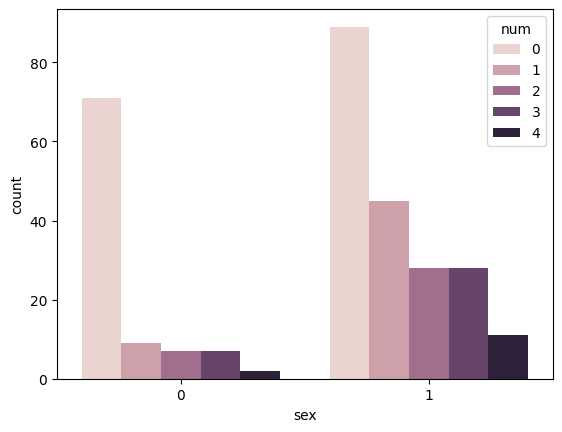

In [31]:
sns.countplot(x=df["sex"],hue=df["num"])
df["sex"].value_counts()  # 1->male  , 0->female , Sex is categorical data

cp
4    142
3     83
2     49
1     23
Name: count, dtype: int64

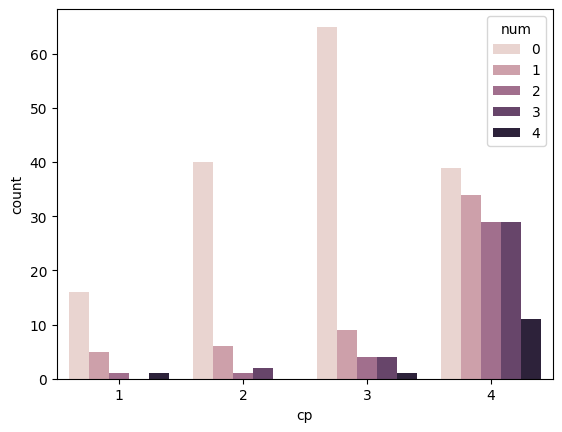

In [32]:
sns.countplot(x=df["cp"],hue=df["num"])
df["cp"].value_counts()    # 1-> first type of chest pain , 2->second type of , 3-> third type of , 4-> fourth type of 

exang
0    200
1     97
Name: count, dtype: int64

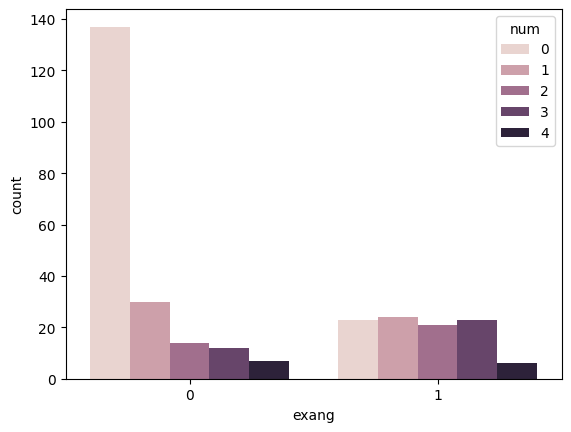

In [33]:
sns.countplot(x=df["exang"],hue=df["num"]) # exang: exercise induced angina (1 = yes; 0 = no)
df["exang"].value_counts() 

fbs
0    254
1     43
Name: count, dtype: int64

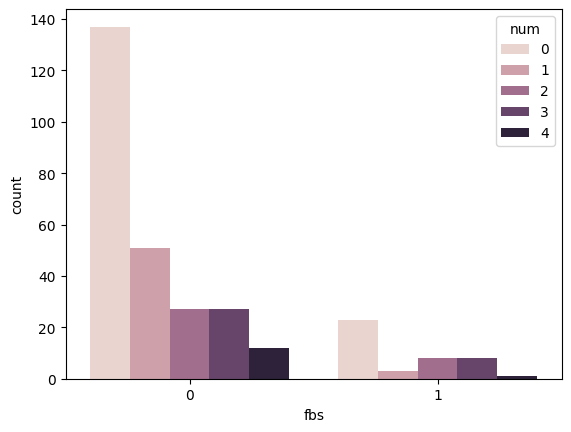

In [34]:
sns.countplot(x=df["fbs"],hue=df["num"]) # fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
df["fbs"].value_counts() 

restecg
0    147
2    146
1      4
Name: count, dtype: int64

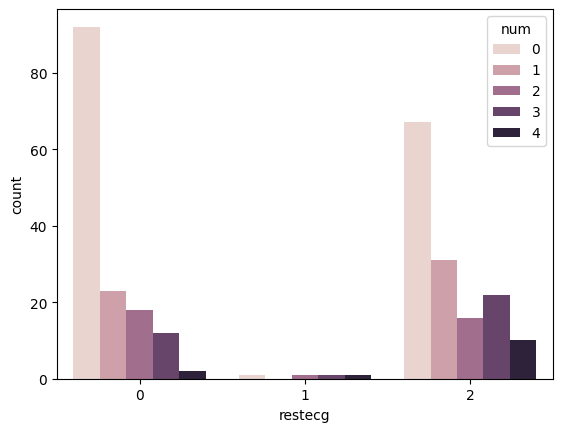

In [35]:
sns.countplot(x=df["restecg"],hue=df["num"])
df["restecg"].value_counts() 
# restecg: resting electrocardiographic results
    #    -- Value 0: normal
      #  -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      #  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

<Axes: xlabel='age', ylabel='Count'>

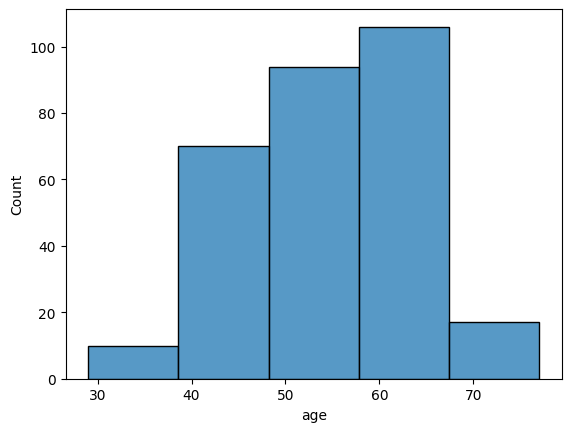

In [37]:
sns.histplot(df["age"],bins=5)

<Axes: ylabel='cp'>

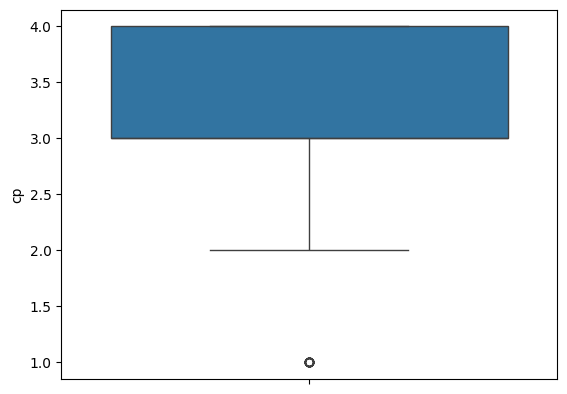

In [38]:
sns.boxplot(df["cp"])

<Axes: ylabel='age'>

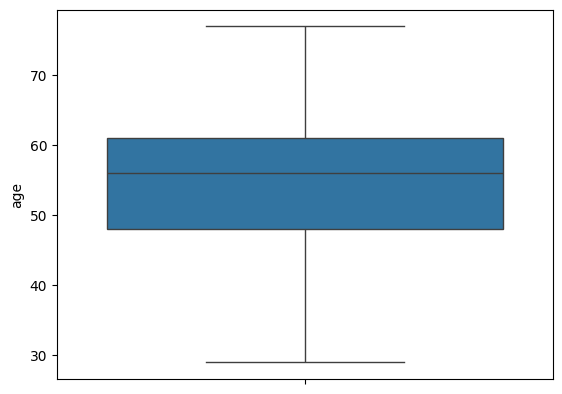

In [40]:
sns.boxplot(df["age"])

<Axes: ylabel='trestbps'>

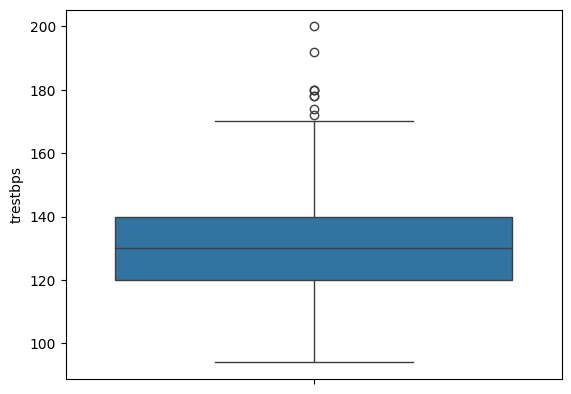

In [41]:
sns.boxplot(df["trestbps"])

<Axes: ylabel='chol'>

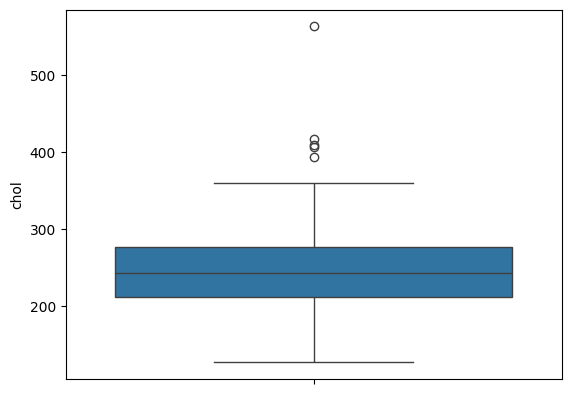

In [42]:
sns.boxplot(df["chol"])

<Axes: ylabel='oldpeak'>

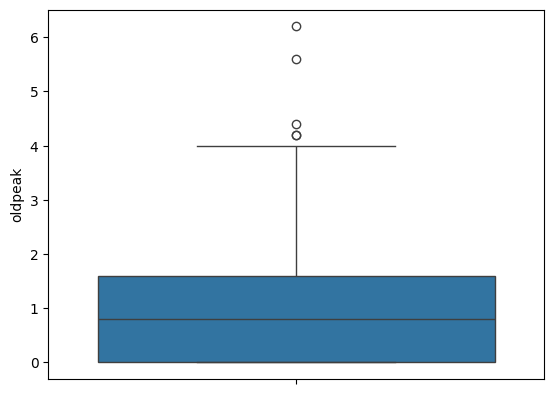

In [44]:
sns.boxplot(df["oldpeak"])

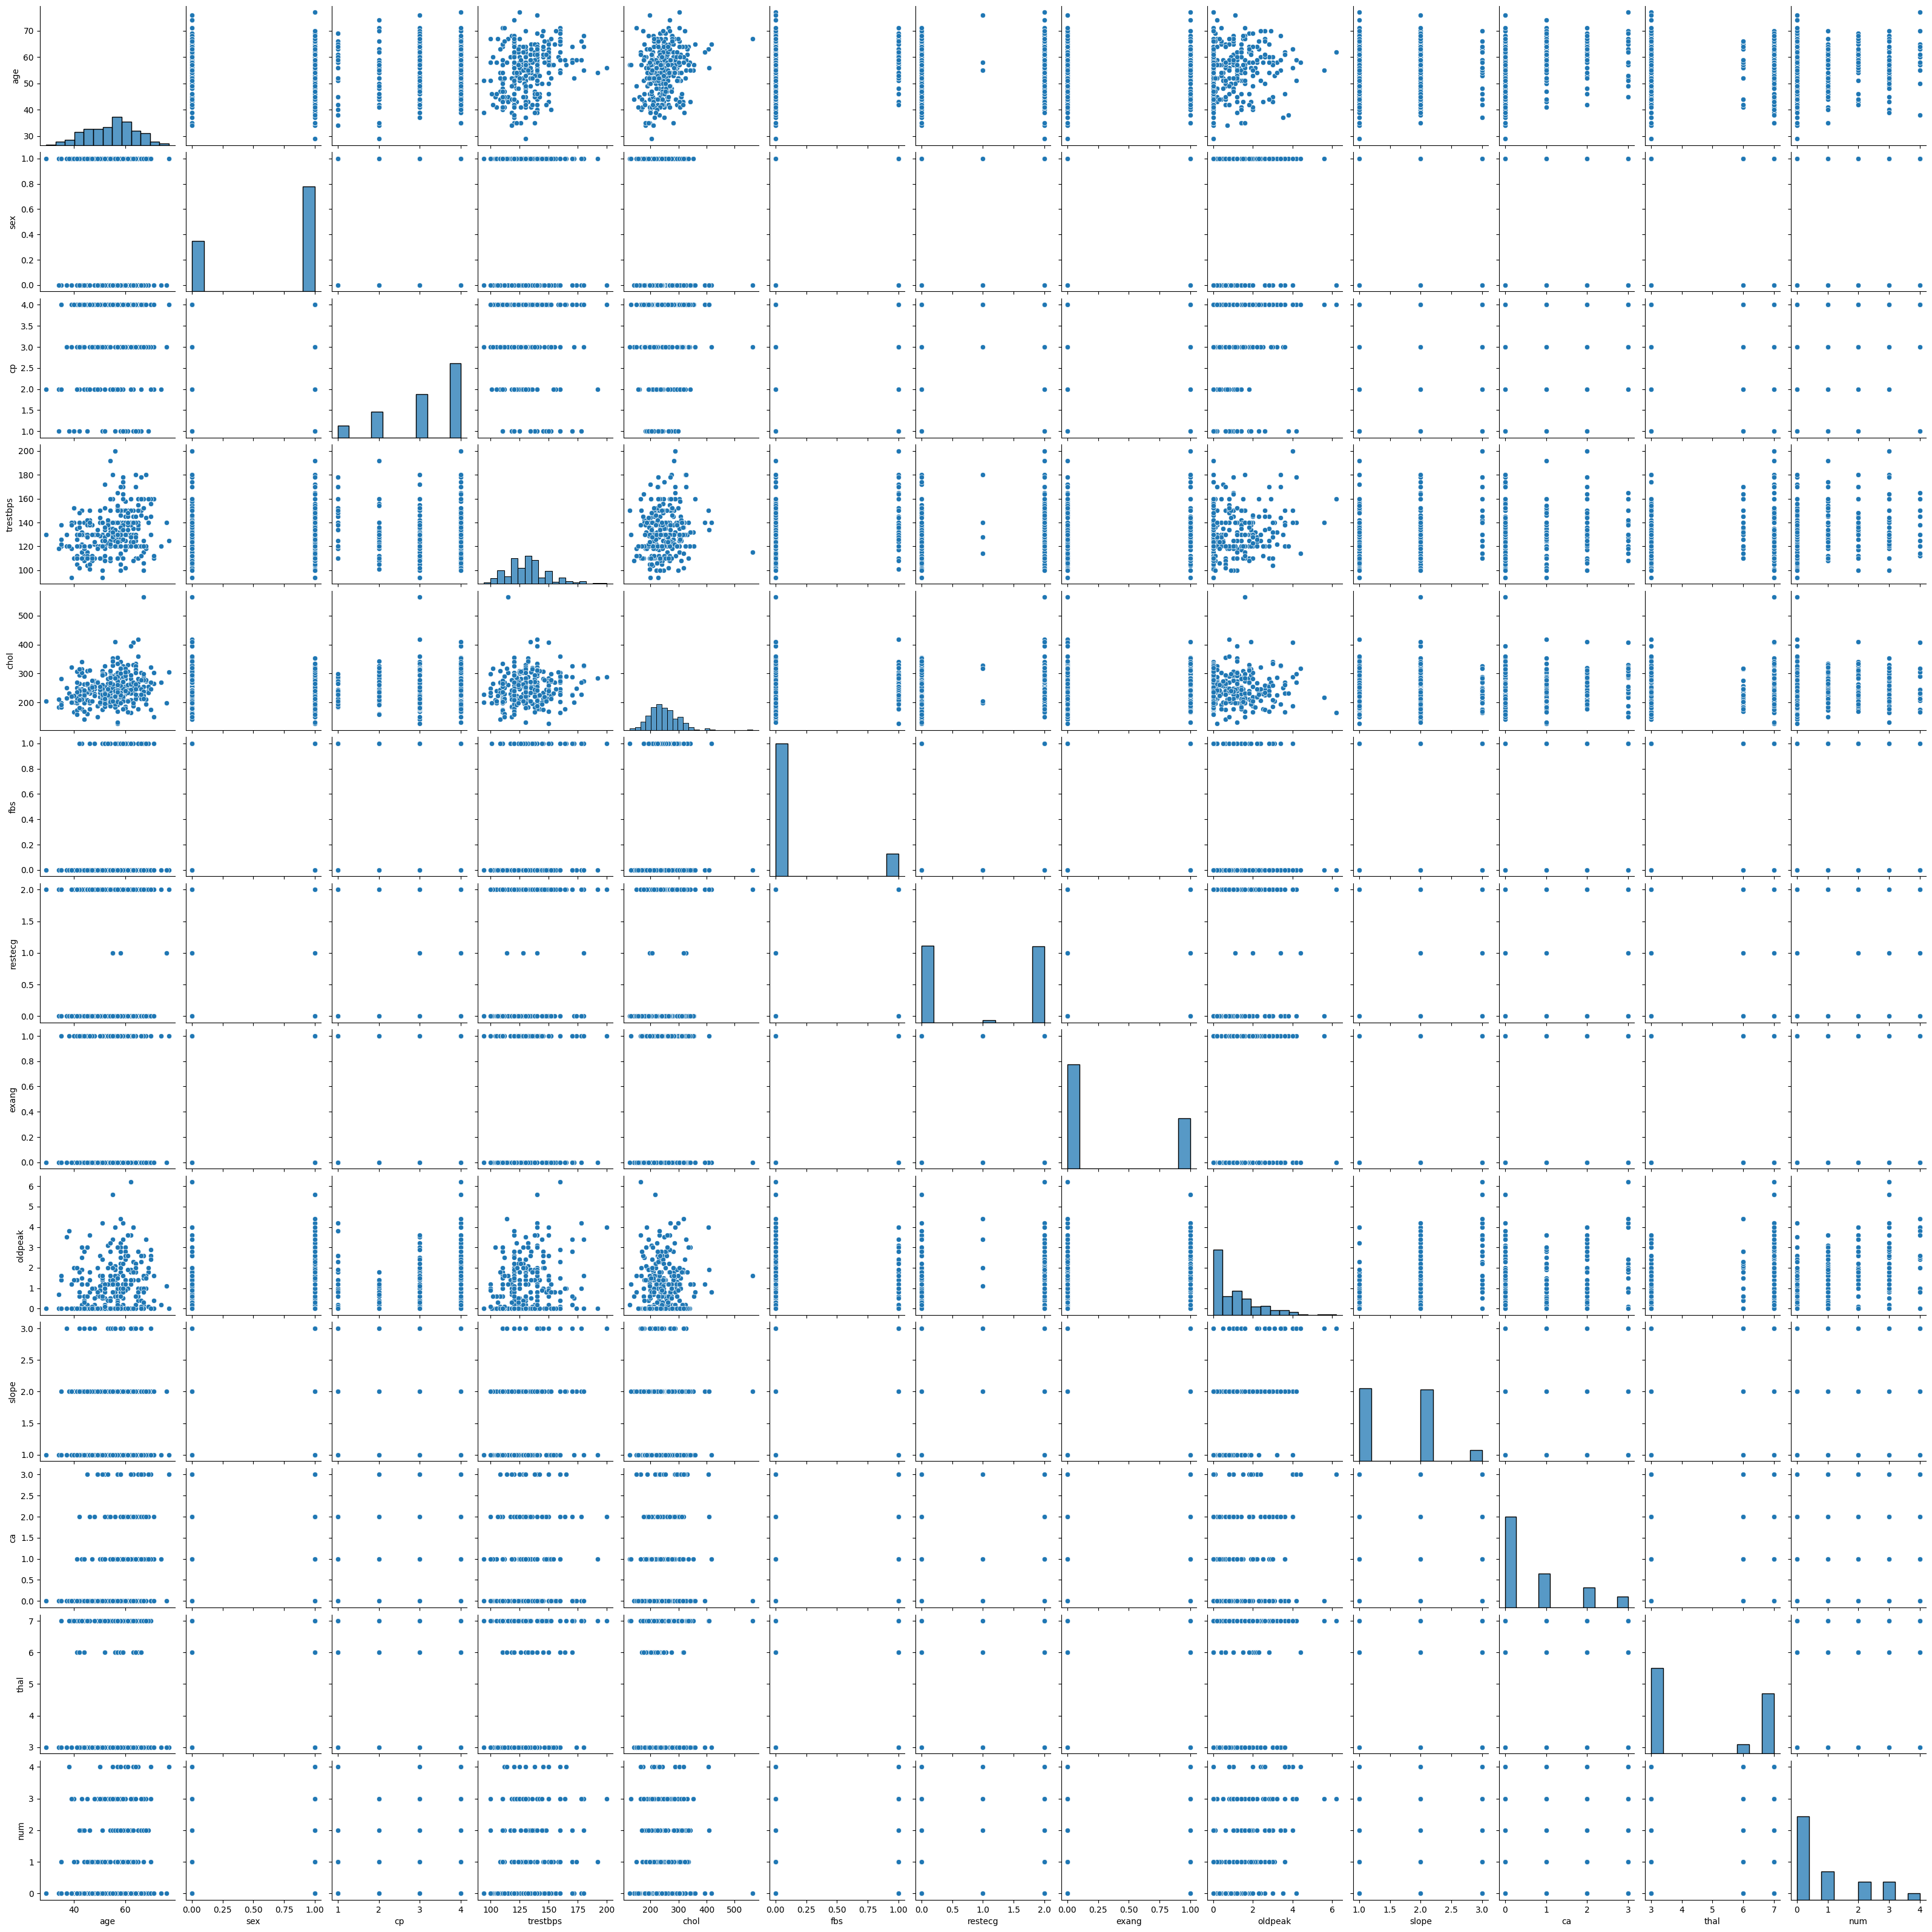

In [48]:
sns.pairplot(df)

In [49]:
df.to_csv("preprocessed_data",index=False)